In [1]:
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Read Data

In [2]:
elon= pd.read_csv("Elon_musk.csv", encoding='Latin1')

In [3]:
elon.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
elon.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
elon.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [6]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [7]:
elon.describe().T

,count,unique,top,freq
Text,1999,1997,The most entertaining outcome is the most likely,2


## Remove all types of punctuations, numbers, special characters and lower letters

In [8]:
raw_tweets = elon.copy()
def clean_text(text):
    text = re.sub(r'@[A-Z_a-z_0-9_]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'#', '', text)     
    text = text.lower()
    return text

raw_tweets['Text'] = elon['Text'].apply(clean_text)
raw_tweets

,Text
0,im an alien
1,ray tracing on cyberpunk with hdr is next-lev...
2,great interview!
3,doge is underestimated
4,congratulations tesla china for amazing execu...
...,...
1994,"true, it sounds so surreal, but the negative ..."
1995,make sure to read ur terms &amp; conditions b...
1996,samwise gamgee
1997,altho dumb and dumber is <u+0001f525><u+0001f...


In [9]:
def thorough_clean(text):
  text = re.sub('[^A-Za-z0-9]', ' ', text)
  return(text)

raw_tweets['Text'] = raw_tweets['Text'].apply(thorough_clean)
raw_tweets

,Text
0,i m an alien
1,ray tracing on cyberpunk with hdr is next lev...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execu...
...,...
1994,true it sounds so surreal but the negative ...
1995,make sure to read ur terms amp conditions b...
1996,samwise gamgee
1997,altho dumb and dumber is u 0001f525 u 0001f...


In [10]:
freq_uncleaned = pd.Series(' '.join(raw_tweets['Text']).split()).value_counts()[:20]
freq_uncleaned

the     487
to      400
a       357
is      356
u       319
of      315
in      221
amp     219
it      194
for     194
s       173
we      172
will    165
be      157
that    149
this    140
i       137
on      129
rt      127
but     126
dtype: int64

## Removing stop words

In [11]:
## Used stop words Txt Files
stop = pd.read_csv('stop.txt', encoding = "ISO-8859-1")
stop.head(7)

,a
0,a's
1,able
2,about
3,above
4,according
5,accordingly
6,across


In [12]:
stop = [a.strip() for a in stop.a]
stop = [a for a in stop if a]
stop[0:10]

["a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards']

In [13]:
final_tweets = raw_tweets.copy()

## Stopwords removal``

In [14]:
final_tweets['Text'] = raw_tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [15]:
final_tweets

,Text
0,alien
1,ray tracing cyberpunk hdr level
2,great interview
3,doge underestimated
4,congratulations tesla china amazing execution ...
...,...
1994,true sounds surreal negative propaganda amp ea...
1995,make read ur terms amp conditions clicking accept
1996,samwise gamgee
1997,altho dumb dumber 0001f525 0001f525


In [16]:
### word frequency after removal of stopwords
freq_cleaned = pd.Series(' '.join(final_tweets['Text']).split()).value_counts()[:20] # for top 20
freq_cleaned

a           357
amp         219
rt          127
tesla        97
0001f923     77
great        76
haha         55
good         51
launch       49
yeah         41
dragon       39
1            38
spacex       37
true         35
high         34
3            34
make         33
people       32
starship     31
year         31
dtype: int64

In [17]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(final_tweets["Text"])
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
vocab = vectorizer.vocabulary_
vocab

{'alien': 299,
 'ray': 2612,
 'tracing': 3324,
 'cyberpunk': 906,
 'hdr': 1557,
 'level': 1903,
 'great': 1496,
 'interview': 1767,
 'doge': 1044,
 'underestimated': 3401,
 'congratulations': 804,
 'tesla': 3238,
 'china': 702,
 'amazing': 315,
 'execution': 1212,
 'year': 3618,
 'happy': 1538,
 'ox': 2315,
 'frodo': 1393,
 'underdoge': 3400,
 'thought': 3265,
 'fail': 1250,
 'haha': 1523,
 'tweets': 3376,
 'represent': 2684,
 'real': 2625,
 'world': 3598,
 'time': 3280,
 'allocation': 303,
 'entertaining': 1166,
 'outcome': 2296,
 'agree': 280,
 'clubhouse': 734,
 'bought': 550,
 'dogecoin': 1046,
 'lil': 1921,
 'toddler': 3290,
 'hodler': 1603,
 'issues': 1791,
 'sentencing': 2847,
 'bit': 509,
 'high': 1593,
 'fixing': 1330,
 'unlock': 3425,
 'account': 236,
 '0001f923': 59,
 'true': 3352,
 'power': 2463,
 'crypto': 889,
 'wallet': 3514,
 'won': 3587,
 'give': 1465,
 'private': 2504,
 'keys': 1825,
 'avoided': 433,
 'costs': 851,
 'app': 341,
 'sucks': 3128,
 'rt': 2765,
 'nasa': 21

In [19]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)

In [20]:
tfidf = vectorizer.fit_transform(final_tweets["Text"]) 
pd.DataFrame(tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.402126,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## types of  N-gram

In [21]:
def get_top_n1_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(1,1),
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [22]:
top1_words = get_top_n1_words(final_tweets["Text"], n=100) #top 100
top1_df = pd.DataFrame(top1_words)
top1_df.columns=["one-gram", "Freq"]
top1_df.head()

,one-gram,Freq
0,amp,219
1,rt,127
2,tesla,97
3,0001f923,77
4,great,76


In [23]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [24]:
top2_words = get_top_n2_words(final_tweets["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,0001f923 0001f923,35
1,rt falcon,17
2,crew dragon,13
3,giga berlin,12
4,falcon stage,9


In [25]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [26]:
top3_words = get_top_n3_words(final_tweets["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head()

,Tri-gram,Freq
0,rt falcon stage,8
1,falcon stage landed,6
2,60 starlink satellites,5
3,dragon operational mission,5
4,rt falcon launches,4


In [27]:
string_Total = " ".join(final_tweets["Text"])

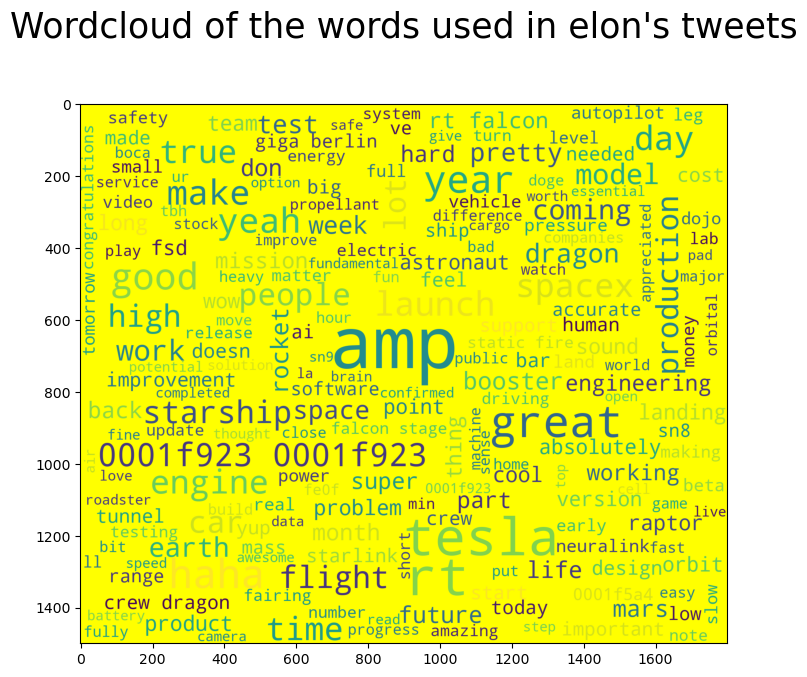

In [28]:
fig = plt.figure(figsize = (15,7))
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'yellow',
                width = 1800,
                height = 1500, random_state = 10, max_font_size = 200
                ).generate(string_Total)
plt.imshow(wordcloud_stw)
plt.title("Wordcloud of the words used in elon's tweets", y=1.11, fontsize=25)
plt.show()

## Sentimental Analysis

In [29]:
from textblob import TextBlob

def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

final_tweets['subjectivity'] = final_tweets['Text'].apply(get_subjectivity)
final_tweets['polarity'] = final_tweets['Text'].apply(get_polarity)
final_tweets

,Text,subjectivity,polarity
0,alien,0.750000,-0.250000
1,ray tracing cyberpunk hdr level,0.000000,0.000000
2,great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,congratulations tesla china amazing execution ...,0.900000,0.600000
...,...,...,...
1994,true sounds surreal negative propaganda amp ea...,0.508333,0.111111
1995,make read ur terms amp conditions clicking accept,0.000000,0.000000
1996,samwise gamgee,0.000000,0.000000
1997,altho dumb dumber 0001f525 0001f525,0.500000,-0.375000


In [30]:
def getanalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  elif score > 0:
      return 'Positive'

final_tweets['Analysis'] = final_tweets['polarity'].apply(getanalysis) 
final_tweets   

,Text,subjectivity,polarity,Analysis
0,alien,0.750000,-0.250000,Negative
1,ray tracing cyberpunk hdr level,0.000000,0.000000,Neutral
2,great interview,0.750000,0.800000,Positive
3,doge underestimated,0.000000,0.000000,Neutral
4,congratulations tesla china amazing execution ...,0.900000,0.600000,Positive
...,...,...,...,...
1994,true sounds surreal negative propaganda amp ea...,0.508333,0.111111,Positive
1995,make read ur terms amp conditions clicking accept,0.000000,0.000000,Neutral
1996,samwise gamgee,0.000000,0.000000,Neutral
1997,altho dumb dumber 0001f525 0001f525,0.500000,-0.375000,Negative


In [31]:
positive = final_tweets[final_tweets['Analysis'] == 'Positive']
positive = positive.sort_values('polarity', ascending = False)
positive

,Text,subjectivity,polarity,Analysis
340,0001f3a9 greatest gatsby 0001f3a9,1.000000,1.000000,Positive
1836,impressive tianwen 1 mars rover mission launch...,1.000000,1.000000,Positive
1901,fermi awesome understood questions,1.000000,1.000000,Positive
1298,lego movie awesome,1.000000,1.000000,Positive
231,awesome,1.000000,1.000000,Positive
...,...,...,...,...
1103,article wildly incorrect lithium battery costs...,0.266667,0.016667,Positive
1327,black scholes formula kinda bs big difference ...,0.344444,0.015873,Positive
150,unlike aircraft division fine faa space divisi...,0.450000,0.008333,Positive
207,launching small satellites a wide range custom...,0.462500,0.006250,Positive


In [32]:
negative = final_tweets[final_tweets['Analysis'] == 'Negative']
negative = negative.sort_values('polarity', ascending = False)
negative

,Text,subjectivity,polarity,Analysis
746,great hear people a lot pcr testing industry a...,0.650000,-1.850372e-17,Negative
1416,giant gap experimental medical device patients...,0.480000,-5.000000e-03,Negative
971,roomy 3 vacuum rocket engines added,0.000000,-8.333333e-03,Negative
1349,rt raptor vacuum engine rvac starship shipped ...,0.000000,-8.333333e-03,Negative
1014,plays poor inventor card rich amp invented kn,0.675000,-1.250000e-02,Negative
...,...,...,...,...
405,writing cobra kai sick 0001f44c,0.857143,-7.142857e-01,Negative
1273,eerie parallels boring company amp vault tec b...,1.000000,-7.500000e-01,Negative
1660,rt moon a base moon send people mars make,1.000000,-8.000000e-01,Negative
1265,insane,1.000000,-1.000000e+00,Negative


In [33]:
Neutral = final_tweets[final_tweets['Analysis'] == 'Neutral']
Neutral = Neutral.sort_values('polarity', ascending = False)
Neutral

,Text,subjectivity,polarity,Analysis
1,ray tracing cyberpunk hdr level,0.0,0.0,Neutral
1406,yup,0.0,0.0,Neutral
1374,,0.0,0.0,Neutral
1373,lhc tbh,0.0,0.0,Neutral
1372,yeah,0.0,0.0,Neutral
...,...,...,...,...
661,yeah pcr ct unequivocal lt 20 doesn matter,0.0,0.0,Neutral
660,a visiting american ah irony,0.0,0.0,Neutral
658,,0.0,0.0,Neutral
657,yeah marginal cost launch 1m 1,0.0,0.0,Neutral


In [34]:
print("% of positive tweets:", round((positive.shape[0]/final_tweets.shape[0])*100, 1))
print("% of negative tweets:", round((negative.shape[0]/final_tweets.shape[0])*100, 1))
print("% of positive tweets:", round((Neutral.shape[0]/final_tweets.shape[0])*100, 1))    

% of positive tweets: 31.7
% of negative tweets: 10.1
% of positive tweets: 58.3


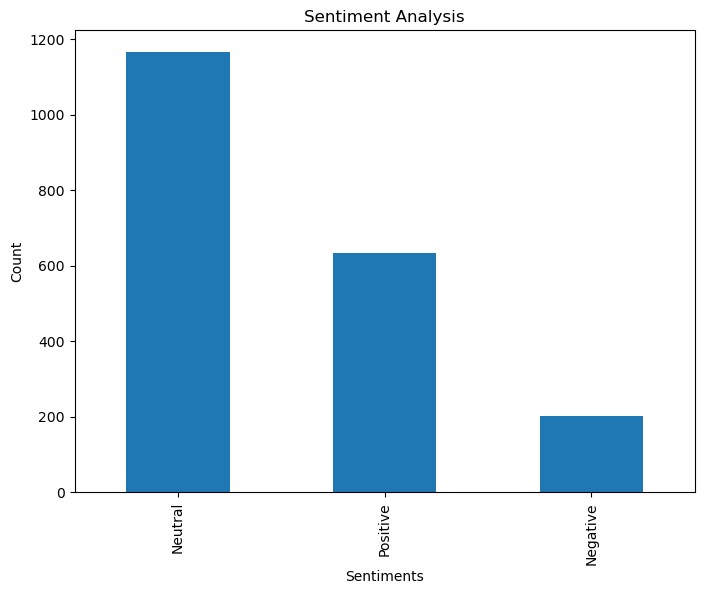

In [35]:
plt.figure(figsize=(8,6))
final_tweets['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

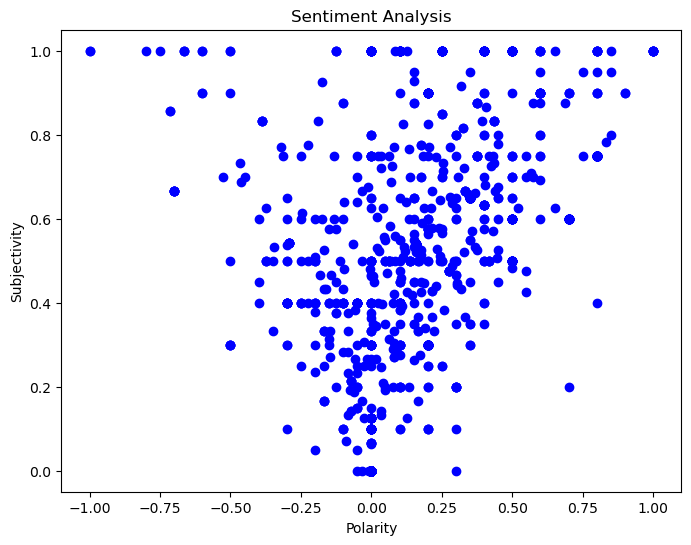

In [36]:
plt.figure(figsize=(8,6))
for i in range(0, final_tweets.shape[0]):
  plt.scatter(final_tweets.polarity[i], final_tweets.subjectivity[i], color = 'blue')

plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()